# Infos

source
- https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
- https://openweathermap.org/

# import packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import requests, json 

# import API Key

In [2]:
with open ("api_key/api_key.txt", "r") as myfile:
    data=myfile.readlines()
api_key = data[0]

# Call API

In [3]:
def forecast_data_call(api_key):
    # Enter your API key here 
    #api_key = "yourkey"

    # base_url variable to store url 
    base_url =  "http://api.openweathermap.org/data/2.5/forecast?"
    # Give city name 
    city_name = 'Berlin,de'
    complete_url = base_url + "appid=" + api_key + "&q=" + city_name 

    # get method of requests module 
    # return response object 
    response = requests.get(complete_url) 

    # json method of response object  
    x = response.json() 
    
    return x

In [4]:
x=forecast_data_call(api_key)

# Format result

In [9]:
def format_values(x):
    weather_data=[]
    for i in range(len(x['list'])):
        weather_data.append([x['list'][i]['dt_txt'],
                             x['list'][i]['main']['temp'],
                             x['list'][i]['main']['humidity'],
                             x['list'][i]['wind']['speed'],
                             x['list'][i]['wind']['deg'],
                             x['list'][i]['weather'][0]['main']
                            ])



    df_weather=pd.DataFrame(weather_data,columns=['datetime','temp','humidity','wind_speed','wind_dir','weather'])
    df_weather.set_index(pd.to_datetime(df_weather.datetime),inplace=True)
    df_weather.drop('datetime',axis=1,inplace=True)
    #kelvin to degree
    df_weather['temp']=df_weather['temp']-273.15
    return df_weather

In [10]:
df_weather=format_values(x)

In [11]:
df_weather.head()

,temp,humidity,wind_speed,wind_dir,weather
datetime,,,,,
2020-03-13 09:00:00,8.39,60,7.87,243,Clouds
2020-03-13 12:00:00,7.64,74,9.55,257,Rain
2020-03-13 15:00:00,8.30,64,9.27,268,Rain
2020-03-13 18:00:00,7.01,67,7.11,273,Rain
2020-03-13 21:00:00,3.95,62,7.41,288,Clear


# Export

In [16]:
export_file_name=''
export_file_name='forecast/forcast_'+str(df_weather.index[0]).replace(' ','_').replace(':','-')+'.csv'
df_weather.to_csv(export_file_name,sep=';')

# Plot

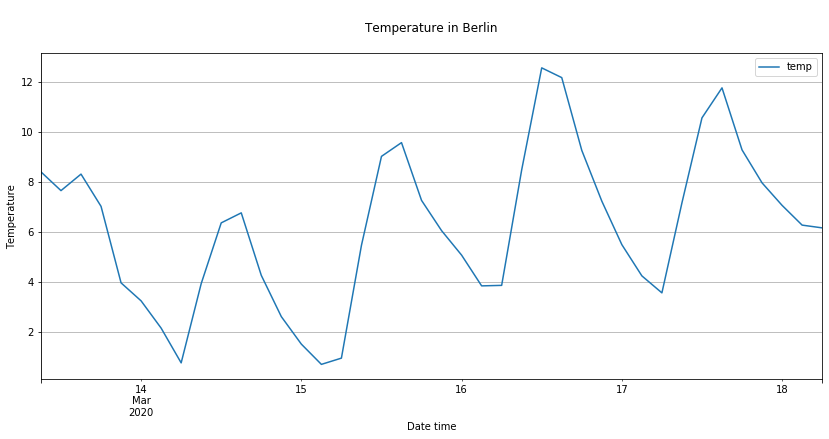

In [14]:
if True:
    plt.figure(figsize=(14,6))
    df_weather['temp'].plot()
    plt.xlabel('Date time')
    plt.ylabel('Temperature')
    plt.title('\nTemperature in Berlin\n')
    plt.grid()
    plt.legend()
    plt.show()